In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
print(df.shape)

(42000, 785)


In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = df.values

In [6]:
print(type(data))

<class 'numpy.ndarray'>


In [7]:
X=data[:,1:]
Y=data[:,0]
print(X.shape,Y.shape)

(42000, 784) (42000,)


In [8]:
split = int(0.8*X.shape[0])
print(split)

33600


In [9]:
X_train =X[:split,:]
Y_train=Y[:split]

X_test = X[split:,:]
Y_test=Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)




(33600, 784) (33600,)
(8400, 784) (8400,)


0


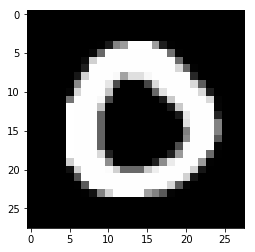

In [10]:
def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show
    
    
drawImg(X_train[4,:])    
print(Y_train[4])

In [15]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    vals = []
    m=X.shape[0]
    
    for i in range (m):
        d= dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
        
        
    vals =sorted(vals)
    vals=vals[:k]
    vals=np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    
    index =new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred
    

In [16]:
pred =knn(X_train,Y_train,X_test[1])  
print(int(pred))

7


7


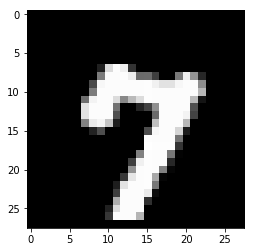

In [17]:
drawImg(X_test[1])
print(Y_test[1])